In [1]:
import pandas as pd
import numpy as np

As a check on the validity of my LDA topic model, I plugged the results back in a Random Forest Classifier. Treating each article as an observation, the journal it was published in as a target, and the LDA topic breakdown as features, I was able to link articles to journals with 96% accuracy!

Inspecting the confusion matrix showed that the journals with substantial inaccuracy were *Cell*, *Science*, and *Nature*.  And this makes sense.  How can *Nature* or *Science* be categorized on the basis of topics?

In [23]:
df = pd.read_csv('11-15 papers.csv', index_col=0)

In [3]:
def random_undersample(df, target):
    new_df = pd.DataFrame()
    
    min_val = min(df[target].value_counts())
    for label in df[target].unique():
        undersample = df[df[target]==label].sample(min_val)
        new_df =  pd.concat([new_df, undersample])
    return new_df

def random_oversample(df, target):
    new_df = pd.DataFrame()
    
    max_val = max(df[target].value_counts())
    for label in df[target].unique():
        oversample = df[df[target]==label].sample(max_val, replace=True)
        new_df =  pd.concat([new_df, oversample])
    return new_df

In [4]:
df2 = random_oversample(df, 'Journal')

In [5]:
df2 = df2.dropna(axis=0)

y = df2.Journal
x = df2[[str(x) for x in list(range(40))]]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

tree = DecisionTreeClassifier()

In [8]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
accuracy_score(tree.predict(x_test), y_test)

0.9618292682926829

In [10]:
forest = RandomForestClassifier()

In [11]:
forest.fit(x_train, y_train)

/home/michael/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
accuracy_score(forest.predict(x_test), y_test)

0.961859756097561

In [13]:
journals = df.Journal.unique()
journals.sort()

con_mat = confusion_matrix(forest.predict(x_test), y_test, labels=journals)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

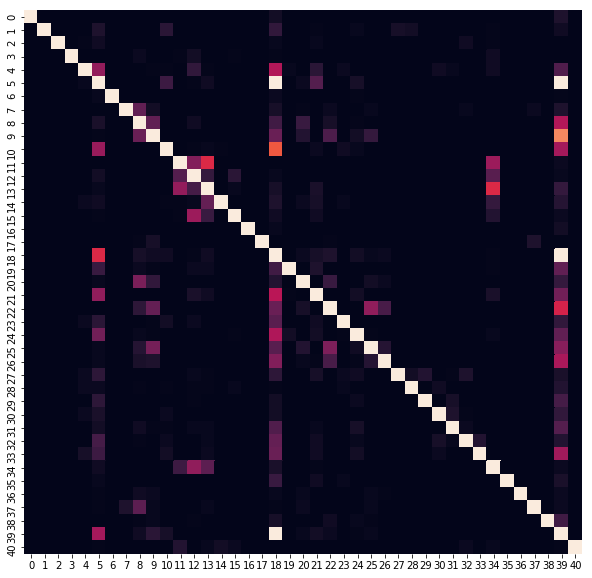

In [15]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(con_mat, vmin=0, vmax=100, cbar=False)

In [16]:
print(journals[5])
print(journals[18])
print(journals[39])

CELL
NATURE
SCIENCE
